In [1]:
import sqlite3
import pandas as pd


In [2]:
# Air Quality Data
air_data = {
    "city": ["Delhi", "Mumbai", "Chennai", "Kolkata", "Bangalore", "Delhi", "Mumbai", "Chennai"],
    "state": ["Delhi", "Maharashtra", "Tamil Nadu", "West Bengal", "Karnataka", "Delhi", "Maharashtra", "Tamil Nadu"],
    "year": [2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021],
    "pm25": [120, 80, 45, 60, 55, 110, 75, 40],
    "pm10": [180, 150, 70, 95, 90, 170, 140, 65],
    "no2": [45, 40, 25, 30, 28, 50, 42, 27],
    "so2": [15, 10, 8, 9, 7, 16, 11, 8],
    "co": [1.8, 1.4, 0.9, 1.0, 0.8, 1.9, 1.3, 0.9]
}
df_air = pd.DataFrame(air_data)

# Water Quality Data
water_data = {
    "location": ["Yamuna", "Ganga", "Godavari", "Narmada", "Cauvery"],
    "year": [2020, 2020, 2020, 2021, 2021],
    "ph": [6.5, 7.2, 8.1, 6.8, 7.4],
    "bod": [3.5, 2.8, 1.9, 3.2, 2.6],
    "dissolved_oxygen": [5.0, 6.8, 7.5, 5.5, 6.4],
    "hardness": [180, 140, 160, 190, 170]
}
df_water = pd.DataFrame(water_data)

# Industry Emissions Data
industry_data = {
    "industry": ["Steel", "Cement", "Power", "Textile", "Automobile"],
    "state": ["Delhi", "Maharashtra", "Tamil Nadu", "West Bengal", "Karnataka"],
    "co2_emission": [400, 320, 280, 220, 200],
    "year": [2020, 2020, 2020, 2020, 2020]
}
df_industry = pd.DataFrame(industry_data)
from google.colab import excel



In [3]:
conn = sqlite3.connect("eco_track.db")
df_air.to_sql("air_quality", conn, if_exists="replace", index=False)
df_water.to_sql("water_quality", conn, if_exists="replace", index=False)
df_industry.to_sql("industry_emissions", conn, if_exists="replace", index=False)


5

In [4]:
query1 = """
SELECT city, ROUND(AVG(pm25), 2) AS avg_pm25
FROM air_quality
GROUP BY city
ORDER BY avg_pm25 DESC;
"""
pd.read_sql(query1, conn)


,city,avg_pm25
0,Delhi,115.0
1,Mumbai,77.5
2,Kolkata,60.0
3,Bangalore,55.0
4,Chennai,42.5


In [10]:
query2 = """
SELECT city, AVG(pm25 + pm10 + so2 + no2 + co) AS pollution_index
FROM air_quality
WHERE year = 2021
GROUP BY city
ORDER BY pollution_index DESC
LIMIT 5;
"""
pd.read_sql(query2, conn)


,city,pollution_index
0,Delhi,347.9
1,Mumbai,269.3
2,Chennai,140.9


In [5]:
query3 = """
SELECT year, ROUND(AVG(pm25), 2) AS avg_pm25
FROM air_quality
GROUP BY year
ORDER BY year;
"""
pd.read_sql(query3, conn)


,year,avg_pm25
0,2020,72.0
1,2021,75.0


In [6]:
query4 = """
SELECT a.state, ROUND(AVG(a.pm25), 2) AS avg_pm25, ROUND(AVG(i.co2_emission), 2) AS avg_emission
FROM air_quality a
JOIN industry_emissions i
ON a.state = i.state AND a.year = i.year
GROUP BY a.state;
"""
pd.read_sql(query4, conn)


,state,avg_pm25,avg_emission
0,Delhi,120.0,400.0
1,Karnataka,55.0,200.0
2,Maharashtra,80.0,320.0
3,Tamil Nadu,45.0,280.0
4,West Bengal,60.0,220.0


In [7]:
query5 = """
SELECT location, ROUND(AVG(ph), 2) AS avg_ph, ROUND(AVG(dissolved_oxygen), 2) AS avg_oxygen
FROM water_quality
GROUP BY location
HAVING avg_ph BETWEEN 6.5 AND 8.5
ORDER BY avg_oxygen DESC;
"""
pd.read_sql(query5, conn)


,location,avg_ph,avg_oxygen
0,Godavari,8.1,7.5
1,Ganga,7.2,6.8
2,Cauvery,7.4,6.4
3,Narmada,6.8,5.5
4,Yamuna,6.5,5.0


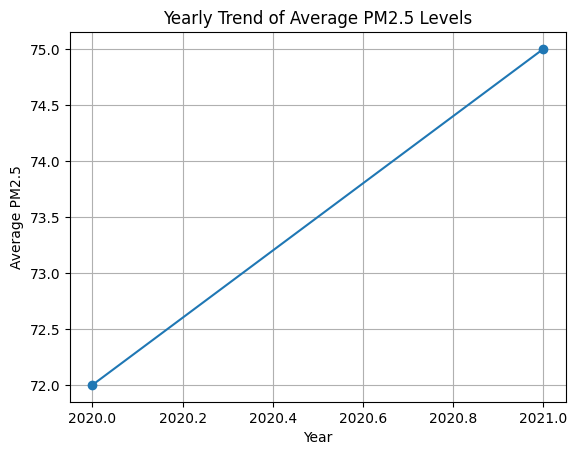

In [8]:
import matplotlib.pyplot as plt

trend = pd.read_sql(query3, conn)
plt.plot(trend["year"], trend["avg_pm25"], marker='o')
plt.title("Yearly Trend of Average PM2.5 Levels")
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.grid(True)
plt.show()


In [11]:
result = pd.read_sql(query2, conn)
result.to_csv("top_polluted_cities.csv", index=False)
print("Results saved to top_polluted_cities.csv")



Results saved to top_polluted_cities.csv
